In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

In [13]:
# Replace 'your_file.csv' with the name of your CSV file
df = pd.read_csv('C:\\Users\\yacco\\afi_project_1\\afi_final_project\\predictions_output_gradient_boosting.csv')

# Display the first few rows of the data
df.head()

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Predicted_PD,True_Label
0,2,22,8900,8900,0,60,0.084828,0,0,0,0.290062,1
1,0,55,10400,9400,0,72,0.083889,0,0,0,0.357017,0
2,1,40,15990,14990,0,60,0.127142,0,1,0,0.225008,1
3,5,43,19999,23233,0,72,0.153289,0,0,0,0.434658,0
4,1,26,11800,4298,1,24,0.115528,0,0,0,0.083357,0


In [14]:
df_true = df.drop(columns=['True_Label'])

In [15]:
X = df_true.drop(columns=['Predicted_PD'])  # Features used in the black box model
y_pred = df_true['Predicted_PD']  # Predicted values (black box model)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_pred, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

# Train a decision tree regressor instead of a classifier
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

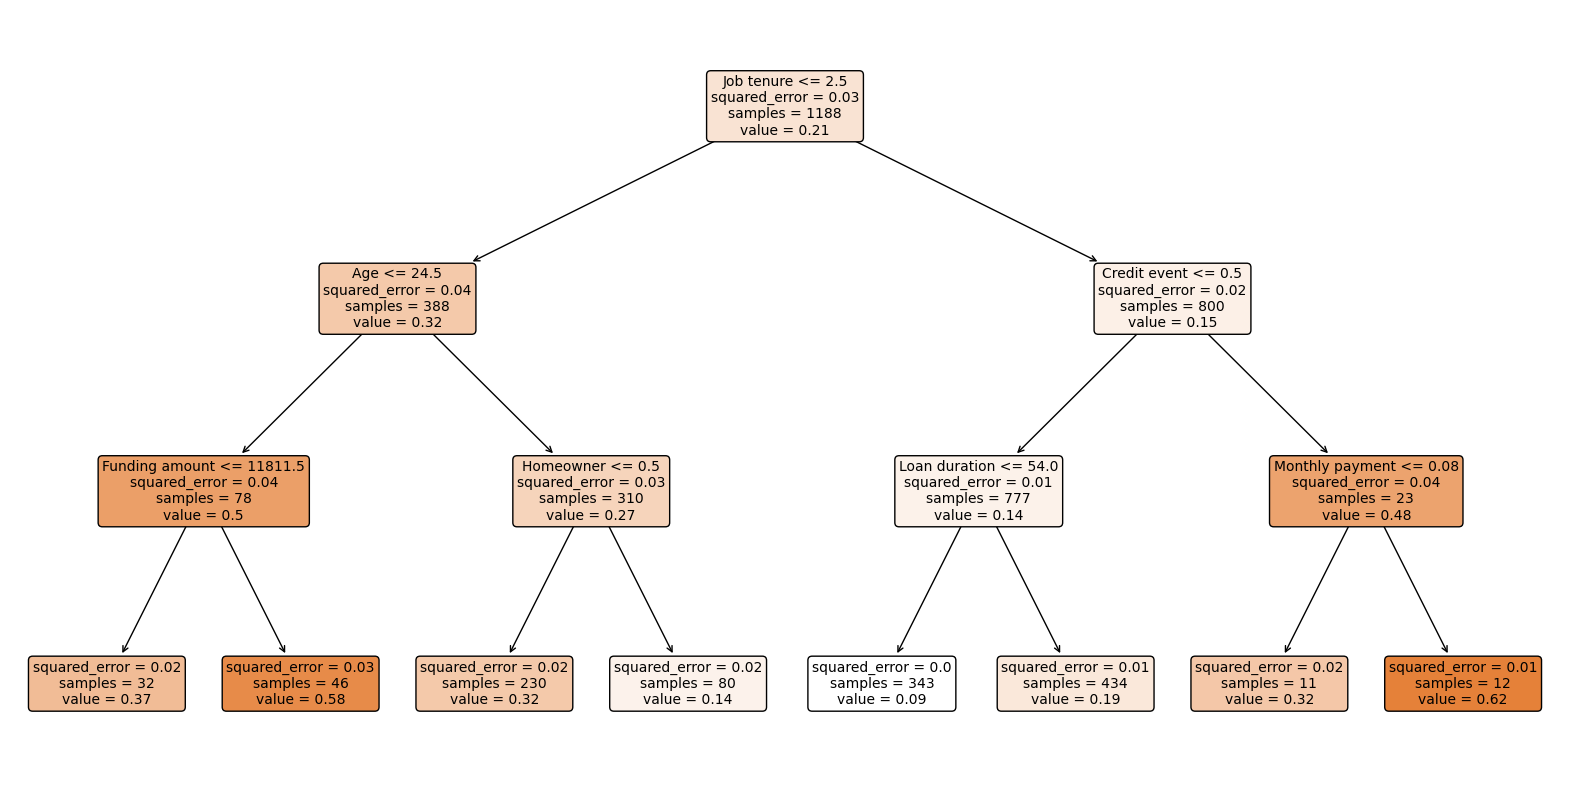

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set up the plot size (adjust as needed)
plt.figure(figsize=(20, 10))

feature_names = X.columns.tolist()

# Plot the tree with decision rules displayed
plot_tree(
    tree_model,
    filled=True,
    feature_names=feature_names,
    rounded=True,
    precision=2,  # Display numerical precision
    proportion=False,  # False means we will show the sample count, not proportion
    fontsize=10,  # Adjust font size for readability
    impurity=True,  # Show impurity (Gini or Entropy)
    class_names=None,
)  # Show class names if available

# Show the plot
plt.show()

In [18]:
from sklearn.tree import export_text

tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)

|--- Job tenure <= 2.50
|   |--- Age <= 24.50
|   |   |--- Funding amount <= 11811.50
|   |   |   |--- value: [0.37]
|   |   |--- Funding amount >  11811.50
|   |   |   |--- value: [0.58]
|   |--- Age >  24.50
|   |   |--- Homeowner <= 0.50
|   |   |   |--- value: [0.32]
|   |   |--- Homeowner >  0.50
|   |   |   |--- value: [0.14]
|--- Job tenure >  2.50
|   |--- Credit event <= 0.50
|   |   |--- Loan duration <= 54.00
|   |   |   |--- value: [0.09]
|   |   |--- Loan duration >  54.00
|   |   |   |--- value: [0.19]
|   |--- Credit event >  0.50
|   |   |--- Monthly payment <= 0.08
|   |   |   |--- value: [0.32]
|   |   |--- Monthly payment >  0.08
|   |   |   |--- value: [0.62]



In [19]:
# Predicting on the test set for both models
y_pred_tree = tree_model.predict(X_test)

Decision Tree - MSE: 0.014708695354317262, MAE: 0.08671428707500774, R²: 0.49123899566025264
Feature Importance from Decision Tree: [0.39468147 0.17698522 0.         0.04661267 0.         0.10680121
 0.02906263 0.14339737 0.         0.10245942]


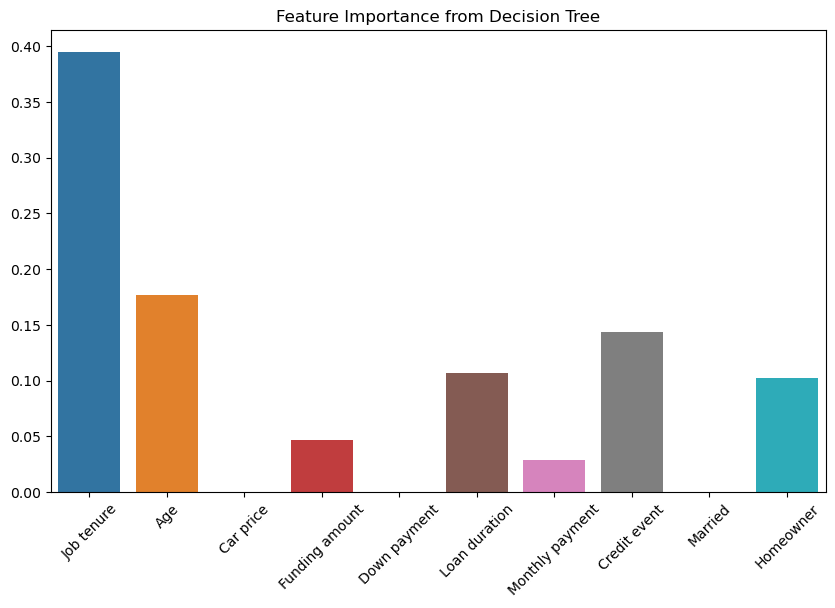

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Checking feature importance for Decision Tree
tree_feature_importance = tree_model.feature_importances_

print(f"Decision Tree - MSE: {mse_tree}, MAE: {mae_tree}, R²: {r2_tree}")
print("Feature Importance from Decision Tree:", tree_feature_importance)

# Visualization of Decision Tree feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=tree_feature_importance)
plt.title("Feature Importance from Decision Tree")
plt.xticks(rotation=45)
plt.show()

## Comparison between Step 1 and Step 4

#### Surrogate for the True Model:
The mean squared error (MSE) is 0.0303, with an R² of 0.309, indicating a moderate level of fit.
Job tenure and Funding amount are the most important features.
Homeowner and Credit event have some importance, but Age has very little weight.
Features like Loan duration, Down payment, and Car price contribute minimally to the model's predictions.

#### Surrogate for the Black-Box Model:

The MSE is 0.0147, and the R² is 0.491, indicating a better fit than the true model surrogate.
Job tenure is still the dominant feature, but Age plays a much more significant role in the black-box model, contributing considerably to the predictions.
Other features like Loan duration, Credit event, and Homeowner also contribute significantly compared to the true model's surrogate.
Car price and Funding amount are relatively less important in this black-box model.

### Decision Tree surrogate

In [22]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_linear = linear_model.predict(X_test)

In [24]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [25]:
print("Mean Squared Error for Linear Regression:", mse_linear)
print("Mean Absolute Error for Linear Regression:", mae_linear)
print("Root Mean Squared Error for Linear Regression:", r2_linear)
print("Coefficients from Linear Regression:", linear_model.coef_)

Mean Squared Error for Linear Regression: 0.00922153850577705
Mean Absolute Error for Linear Regression: 0.07132228984643177
Root Mean Squared Error for Linear Regression: 0.6810349878937612
Coefficients from Linear Regression: [-3.02488710e-03 -7.37383774e-04 -1.51950403e-05  2.00125304e-05
  3.73307400e-02  1.51393881e-03  4.53095552e-01  3.25607728e-01
 -7.60521253e-02 -6.27778200e-02]


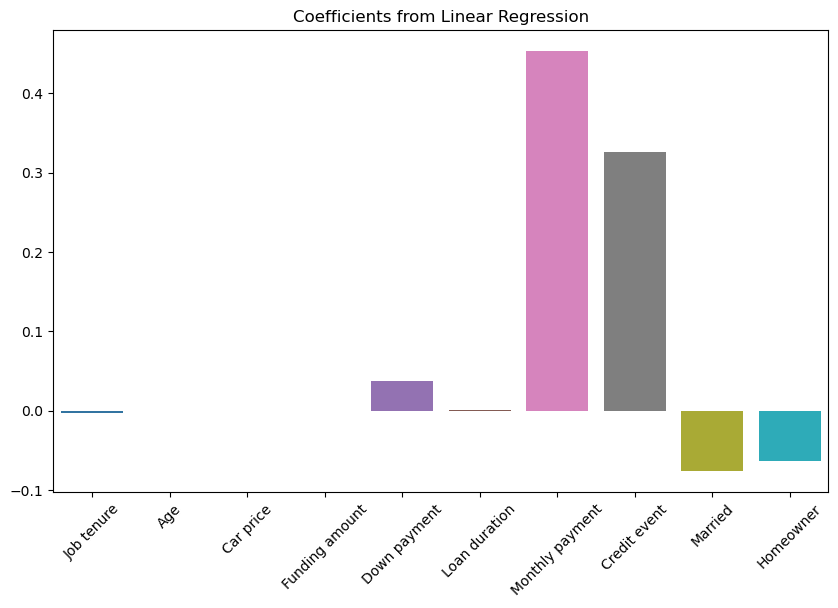

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=linear_model.coef_)
plt.title("Coefficients from Linear Regression")
plt.xticks(rotation=45)
plt.show()

* **Surrogate for the True Model**:

  - **Mean Squared Error (MSE)**: 0.0092
  - **Mean Absolute Error (MAE)**: 0.0713
  - **R² Score**: 0.681

  The largest contributors to predictions are:
  - **Monthly Payment**: This feature has the highest coefficient, indicating that it plays the most significant role in predicting the outcome.
  - **Credit Event**: This feature is also influential but to a lesser extent compared to Monthly Payment.
  - **Married and Homeowner**: These features have smaller, yet positive, contributions to the model’s prediction.
  - **Job Tenure and Age** have very small, near-zero coefficients, indicating that they have little impact on predictions.

* **Surrogate for the Black-Box Model**:

  - **MSE**: 0.0253 (higher, indicating a worse fit compared to the true model surrogate)
  - **MAE**: 0.1206 (higher, indicating less accurate predictions)
  - **R² Score**: 0.423 (lower, suggesting a poorer fit compared to the surrogate for the true model)

  The most important features are:
  - **Monthly Payment**: Similar to the true model surrogate, this feature has the highest coefficient, playing a dominant role in the black-box predictions.
  - **Credit Event**: Also a strong contributor, though the coefficient is slightly lower than in the true model surrogate.
  - **Down Payment**: This feature becomes more relevant in the black-box model surrogate compared to the true model surrogate, which gave it minimal importance.
  - **Job Tenure and Age** still have minimal to no effect on the predictions.
  - **Married and Homeowner** contribute, but less significantly than Monthly Payment and Credit Event.
